In [1]:
import json

In [2]:
# Load scraped tweets from json file


with open('alltweets_tesseract.json') as f:
    tesseract_tweets = json.loads(f.read())
with open('alltweets_periphery.json') as f:
    periphery_tweets = json.loads(f.read())

In [3]:
followers_T = tesseract_tweets[1]['user']['followers_count']
followers_P = periphery_tweets[1]['user']['followers_count']

In [4]:
tesseract_tweets[5]['full_text']

"RT @majesticdetroit: We're going hard this Sunday in the Theatre with @tesseractband, @plinirh\n&amp; @astronoid\nhttps://t.co/FfLHAKADbM https:/…"

In [5]:
def count_rt(tweet_list):
    counter = 0
    for tweet in tweet_list:
        if 'retweeted_status' in list(tweet.keys()):
            counter += 1
    
    return counter

In [6]:
print(count_rt(tesseract_tweets))
print(count_rt(periphery_tweets))

983
367


The first thing we notice is that Tesseract has a lot more retweets than Periphery (983 vs 367).  To examine the bands social media strategies, we need to remove these tweets.

The goal is to analyze the difference language by the two bands in their tweets which might indicate a difference in the way the bands communicate with their fans that drive fan engagement.  

We will use bag of words, text vectorization, and other methods to analyze the tweet texts.

In [7]:
twtText_T = [tweet['full_text'] for tweet in tesseract_tweets if 'retweeted_status' not in list(tweet.keys())]
twtText_P = [tweet['full_text'] for tweet in periphery_tweets if 'retweeted_status' not in list(tweet.keys())]

In [8]:
len(twtText_T)

2211

In [9]:
import re
a = re.split('(\n)', '\n\n@tesseractband')
print(a)
for word in a:
    if word == '\n' or word == '':
        print('uh-oh')

['', '\n', '', '\n', '@tesseractband']
uh-oh
uh-oh
uh-oh
uh-oh


In [10]:
def clean_tweets(tweet_list, output = 'BOW'):
    '''
    input a tweet list of strings, return bag of words
    returned words will retain hashtagged words and user mentions
    i.e. # will be in front of hashtagged words
    @ will be in front of mentioned users
    '''
    # Remove all puncts other than @ and #
    # This to retain information about user mentions
    # Add a few unconventional symbols that need to be excluded/appended
    
    import string
    import re
    
    # First, filter out emojis as much as possible
    
    emoji_pattern = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    tweet_list = [emoji_pattern.sub(r'', tweet) for tweet in tweet_list]
    
    exclude = list(string.punctuation)
    exclude.remove('@')
    exclude.remove('#')
    exclude.append('…')
    exclude.append('”')
    exclude.append('♫')
    
    words = []
    for tweet in tweet_list:
        temp = list(tweet)
        tmpwrds = ''.join(ch for ch in temp if ch not in exclude).split(' ')
        tmpwrds2 = []
        
        # retain hashtag information
        # removes '\n' and replacing it with # in front of hashtagged words
        for wrd in tmpwrds:
            a = re.split('\n', wrd)
            for word in a:
                if word in ['\n', '']:
                    continue
                else:
                    tmpwrds2.append(word)
        # Here we remove residual white spaces and #/@ that appear only by themselves
        tmpwrds2 = [word for word in tmpwrds2 if word not in ['', '#', '@']]
        
        if output == 'BOW':
            words.extend(tmpwrds2)
        elif output == 'List of Tweets':
            words.append(tmpwrds2)
    
    return words
        
    

In [11]:
bow_T = clean_tweets(twtText_T)
bow_P = clean_tweets(twtText_P)

words_byTwt_T = clean_tweets(twtText_T, output = 'List of Tweets')
words_byTwt_P = clean_tweets(twtText_P, output = 'List of Tweets')

At the most basic level, we can know how long are each tweet, on average.

In [12]:
# Test whether difference is material

from scipy.stats import ks_2samp

twtLen_list_T = [len(i) for i in words_byTwt_T]
twtLen_list_P = [len(i) for i in words_byTwt_P]

ks_len = ks_2samp(twtLen_list_T, twtLen_list_P)

avg_twt_len_T = len(bow_T)/len(twtText_T)
avg_twt_len_P = len(bow_P)/len(twtText_P)

print('Tesseract Avg Tweet Length in Words: '+ str(avg_twt_len_T))
print('Periphery Avg Tweet Length in Words: '+ str(avg_twt_len_P))
print('kstest pvalue: ' + str(ks_len.pvalue))

Tesseract Avg Tweet Length in Words: 11.2876526458616
Periphery Avg Tweet Length in Words: 13.896950578338592
kstest pvalue: 6.81891086679e-69


The difference in tweet length seem to be different, but the difference in content is more important.

1) Is there a difference in terms of number of hashtags?

2) Is there a difference in terms of number of user mentions?

3) Is there a difference in terms of links?

In [13]:
def count_matches(list_of_strings, a_pattern):
    import re
    count = 0
    for word in list_of_strings:
        if re.search(a_pattern, word):
            count +=1
    return count

In [14]:
hash_count_T = [count_matches(tweet, '#') for tweet in words_byTwt_T]
mention_count_T = [count_matches(tweet, '@') for tweet in words_byTwt_T]
link_count_T = [count_matches(tweet, 'http') for tweet in words_byTwt_T]
hash_count_P = [count_matches(tweet, '#') for tweet in words_byTwt_P]
mention_count_P = [count_matches(tweet, '@') for tweet in words_byTwt_P]
link_count_P = [count_matches(tweet, 'http') for tweet in words_byTwt_P]

In [15]:
ks_hash = ks_2samp(hash_count_T, hash_count_P)
print('Tesseract Avg hashtags per tweet: '+ str(sum(hash_count_T)/len(hash_count_T)))
print('Periphery Avg hashtags per tweet: '+ str(sum(hash_count_P)/len(hash_count_P)))
print('kstest pvalue: ' + str(ks_hash.pvalue))

Tesseract Avg hashtags per tweet: 0.08276797829036635
Periphery Avg hashtags per tweet: 0.08832807570977919
kstest pvalue: 0.894168076844


In [16]:
ks_mention = ks_2samp(mention_count_T, mention_count_P)
print('Tesseract Avg user mentions per tweet: '+ str(sum(mention_count_T)/len(mention_count_T)))
print('Periphery Avg user mentions per tweet: '+ str(sum(mention_count_P)/len(mention_count_P)))
print('kstest pvalue: ' + str(ks_mention.pvalue))

Tesseract Avg user mentions per tweet: 0.36589778380823157
Periphery Avg user mentions per tweet: 0.40658955485453907
kstest pvalue: 0.355822658986


In [17]:
ks_link = ks_2samp(link_count_T, link_count_P)
print('Tesseract Avg links per tweet: '+ str(sum(link_count_T)/len(link_count_T)))
print('Periphery Avg links per tweet: '+ str(sum(link_count_P)/len(link_count_P)))
print('kstest pvalue: ' + str(ks_link.pvalue))


Tesseract Avg links per tweet: 1.0167345092718227
Periphery Avg links per tweet: 0.9922888187872415
kstest pvalue: 3.9025368385e-07


Periphery seems to feature more links and the difference between the two bands is statistically significant, although the absolute difference is quite small.  This finding can be seen as evidence for increased usage of links, but they are unlikely to drive the difference between the observed fan engagement difference between the two bands.

We will now dive deeper into the content of the tweets to see if they impact interaction intensity.

In [18]:
def strip_tweets(list_of_words):
    '''
    Remove hashtags, user mentions, and links
    Remove stopwords
    Stem words
    output the list
    '''
    import re
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    
    stopWords = set(stopwords.words('english'))
    
    # Remove numbers or words with numbers
    temp_list = [word for word in list_of_words if not re.search(r'\d', word)]
    
    # Remove hashtags, usermentions, and links
    temp_list = [word for word in temp_list if not re.match('#', word) and not re.match('@', word) and not re.search('http', word)]
    
    # Remove stopwords
    temp_list = [word for word in temp_list if word not in stopWords]
    
    # Stemming the words
    ps = PorterStemmer()
    temp_list = [ps.stem(word) for word in temp_list]
    
    return temp_list

In [19]:
words_stripped_T = strip_tweets(bow_T)
words_stripped_P = strip_tweets(bow_P)

twt_stripped_T = [strip_tweets(tweet) for tweet in words_byTwt_T]
twt_stripped_P = [strip_tweets(tweet) for tweet in words_byTwt_P]

In [20]:
print('Tesseract Unique Word Count: '+ str(len(set(words_stripped_T))))
print('Periphery Unique Word Count: '+ str(len(set(words_stripped_P))))

Tesseract Unique Word Count: 2401
Periphery Unique Word Count: 2983


In [21]:
def lexical_diversity(words):
    return len(set(words))/len(words)

In [22]:
print('Tesseract Lexical Diversity:', lexical_diversity(words_stripped_T))
print('Periphery Lexical Diversity:', lexical_diversity(words_stripped_P))

real_diff = lexical_diversity(words_stripped_T) - lexical_diversity(words_stripped_P)

Tesseract Lexical Diversity: 0.16858587277067827
Periphery Lexical Diversity: 0.13567724915855545


Having access to word stems stripped of other references, we can look at the highest frequency words that are in Tesseract and Periphery's tweets to gain insight about how the two bands differ in their interaction patterns with fans.

In [23]:
from collections import Counter

wrdCount_T = Counter(words_stripped_T)
wrdCount_P = Counter(words_stripped_P)


In [24]:
wrdCount_T.most_common()

[('avail', 228),
 ('today', 208),
 ('just', 180),
 ('polari', 171),
 ('oct', 169),
 ('announc', 160),
 ('tour', 154),
 ('tesseract', 153),
 ('store', 149),
 ('the', 136),
 ('show', 126),
 ('tomorrow', 123),
 ('nov', 121),
 ('EU', 120),
 ('thi', 117),
 ('video', 113),
 ('new', 112),
 ('I', 112),
 ('We', 104),
 ('weekend', 98),
 ('US', 87),
 ('who', 86),
 ('unit', 86),
 ('kingdom', 85),
 ('america', 84),
 ('thank', 83),
 ('come', 82),
 ('playlist', 79),
 ('feb', 79),
 ('vip', 75),
 ('ad', 75),
 ('bundl', 66),
 ('week', 65),
 ('next', 65),
 ('album', 64),
 ('ticket', 62),
 ('time', 62),
 ('live', 62),
 ('preorder', 59),
 ('north', 58),
 ('germani', 58),
 ('check', 54),
 ('us', 50),
 ('jun', 49),
 ('tonight', 46),
 ('canada', 46),
 ('europ', 46),
 ('right', 45),
 ('franc', 45),
 ('rock', 45),
 ('see', 44),
 ('festiv', 43),
 ('mar', 43),
 ('day', 41),
 ('still', 41),
 ('contortionist', 41),
 ('jul', 39),
 ('exclus', 38),
 ('get', 35),
 ('releas', 35),
 ('last', 34),
 ('post', 34),
 ('small'

In [25]:
wrdCount_P.most_common()

[('new', 281),
 ('tour', 260),
 ('check', 246),
 ('the', 223),
 ('get', 211),
 ('matt', 204),
 ('I', 203),
 ('come', 171),
 ('ticket', 169),
 ('guitar', 169),
 ('guy', 165),
 ('day', 160),
 ('hey', 155),
 ('here', 153),
 ('us', 139),
 ('thank', 138),
 ('who', 136),
 ('show', 130),
 ('merch', 130),
 ('song', 129),
 ('peripheri', 123),
 ('juggernaut', 120),
 ('see', 116),
 ('today', 115),
 ('pick', 113),
 ('store', 107),
 ('play', 107),
 ('mark', 104),
 ('We', 101),
 ('video', 101),
 ('one', 96),
 ('thi', 95),
 ('go', 94),
 ('If', 90),
 ('sale', 89),
 ('summer', 85),
 ('vote', 85),
 ('In', 83),
 ('drummer', 79),
 ('misha', 79),
 ('peripher', 77),
 ('live', 77),
 ('want', 77),
 ('last', 76),
 ('avail', 74),
 ('grab', 74),
 ('vip', 74),
 ('follow', 73),
 ('tonight', 71),
 ('all', 68),
 ('music', 67),
 ('head', 67),
 ('jake', 67),
 ('were', 66),
 ('date', 64),
 ('friend', 64),
 ('europ', 63),
 ('drum', 62),
 ('dont', 62),
 ('love', 62),
 ('lesson', 62),
 ('yet', 61),
 ('good', 61),
 ('album

We can already see some patterns - Periphery tweets are more direct, using words that are calls for action more frequently such as check, come, instead of announce, available. Also, Periphery's tweets feel more personal as they are more likely to use words like guy, hey to address directly the fans, and there are frequent mentions of band members by their first names, whereas Tesseract's typical language is a lot more inpersonal and formal.  This is also reflected in the differing lexical diversity, as Tesseract uses more diverse words pointing to a more sophisticated form of language.

Perhaps sentiment analysis and digrams/trigrams can tell us more about how the tweets differ?

In [26]:
afinnlist = [l.strip().split('\t') for l in open('../data/AFINN/AFINN-111.txt').readlines()]
afinn = {k:int(v) for k,v in afinnlist}

In [27]:
# Overall sentiment
from nltk.stem import PorterStemmer
ps = PorterStemmer()

afinnstem = {}
for k,v in afinn.items():
    afinnstem[ps.stem(k)] = v

def pull_sentiment(wordlist, store_not_found=False):
    import numpy as np
    sentiment = []
    for word in wordlist:
        if word.lower() in afinnstem:
            sentiment.append(afinnstem[word.lower()])
        else:
            if store_not_found == True:
                sentiment.append(np.nan)
    return sentiment

In [28]:
def pull_sentiment_word(word, store_not_found=False):
    import numpy as np
    if word.lower() in afinnstem:
        return afinnstem[word.lower()]
    else:
        if store_not_found == True:
            return np.nan

In [29]:
sum(pull_sentiment(words_stripped_T))/len(words_stripped_T)

0.11810139025417779

In [30]:
sum(pull_sentiment(words_stripped_P))/len(words_stripped_P)

0.133585008641863

In [101]:
ks_sentiment = ks_2samp(pull_sentiment(words_stripped_T), pull_sentiment(words_stripped_P))

In [102]:
ks_sentiment

Ks_2sampResult(statistic=0.047545292405895043, pvalue=0.051821499856981618)

Periphery's per-tweet sentiment seems to be slightly more positive, but the difference was not significant at the 0.05 level.

In [167]:
!pip install wordcloud

    100% |████████████████████████████████| 174kB 6.2MB/s ta 0:00:01
  Running setup.py bdist_wheel for wordcloud ... done
  Stored in directory: /Users/roblee/Library/Caches/pip/wheels/3e/40/7c/d768cb5022ec6aa5611728339886bc1e9f0b629547f39237fd
Successfully built wordcloud


With a p-value of just above 0.05 from the KS test of the sentiment list of the two bands, there is some evidence that Periphery is systematically more positive in its use of words in tweets.  What are these words?

In [31]:
[(word, count, pull_sentiment_word(word)) for word, count in wrdCount_T.most_common() if pull_sentiment_word(word) is not None]

[('unit', 86, 1),
 ('thank', 83, 2),
 ('live', 62, 2),
 ('festiv', 43, 2),
 ('exclus', 38, 2),
 ('awesom', 31, 4),
 ('great', 30, 3),
 ('play', 30, 2),
 ('like', 28, 2),
 ('limit', 26, -1),
 ('best', 24, 3),
 ('back', 20, 1),
 ('good', 19, 3),
 ('free', 19, 1),
 ('sorri', 18, -1),
 ('love', 17, 2),
 ('nice', 16, 3),
 ('ye', 16, 1),
 ('surviv', 15, 2),
 ('win', 14, 4),
 ('support', 14, 2),
 ('hope', 14, 2),
 ('use', 14, 2),
 ('amaz', 14, 4),
 ('fun', 13, 4),
 ('excit', 11, 3),
 ('wonder', 10, 4),
 ('want', 10, 1),
 ('happi', 10, 3),
 ('fan', 9, 3),
 ('join', 9, 1),
 ('sweet', 9, 2),
 ('miss', 9, -2),
 ('share', 8, 1),
 ('cheer', 8, 2),
 ('big', 8, 1),
 ('yeah', 8, 1),
 ('huge', 8, 1),
 ('enjoy', 7, 2),
 ('cool', 7, 1),
 ('haha', 7, 3),
 ('fall', 7, -1),
 ('rescu', 7, 2),
 ('top', 6, 2),
 ('bad', 6, -3),
 ('chanc', 5, 2),
 ('ha', 5, 2),
 ('No', 5, -1),
 ('power', 5, 2),
 ('long', 5, -1),
 ('wow', 5, 4),
 ('inspir', 5, 3),
 ('chill', 5, -1),
 ('better', 4, 2),
 ('fail', 4, -2),
 ('OK', 4,

In [32]:
[(word, count, pull_sentiment_word(word)) for word, count in wrdCount_P.most_common() if pull_sentiment_word(word) is not None and pull_sentiment_word(word) > 0]

[('thank', 138, 2),
 ('play', 107, 2),
 ('live', 77, 2),
 ('want', 77, 1),
 ('love', 62, 2),
 ('good', 61, 3),
 ('like', 53, 2),
 ('fan', 52, 3),
 ('clear', 52, 1),
 ('best', 48, 3),
 ('awesom', 46, 4),
 ('free', 46, 1),
 ('back', 40, 1),
 ('use', 36, 2),
 ('great', 36, 3),
 ('excit', 35, 3),
 ('win', 33, 4),
 ('amaz', 30, 4),
 ('share', 30, 1),
 ('fun', 29, 4),
 ('favorit', 29, 2),
 ('happi', 28, 3),
 ('enjoy', 28, 2),
 ('chanc', 26, 2),
 ('god', 26, 1),
 ('award', 23, 3),
 ('hope', 20, 2),
 ('help', 19, 2),
 ('big', 18, 1),
 ('festiv', 18, 2),
 ('exclus', 18, 2),
 ('top', 17, 2),
 ('ye', 17, 1),
 ('haha', 14, 3),
 ('progress', 14, 2),
 ('pleas', 13, 3),
 ('sweet', 13, 2),
 ('huge', 12, 1),
 ('nice', 12, 3),
 ('support', 12, 2),
 ('join', 12, 1),
 ('pretti', 11, 1),
 ('interest', 11, 1),
 ('cool', 10, 1),
 ('winner', 9, 4),
 ('super', 9, 3),
 ('yeah', 9, 1),
 ('warm', 8, 1),
 ('posit', 8, 2),
 ('OK', 8, 2),
 ('better', 7, 2),
 ('save', 7, 2),
 ('wow', 7, 4),
 ('ok', 7, 2),
 ('hero', 7

A closer look at these tweets show that Periphery also has a high tendency to use words associated with positive sentiment in tweets. The word "thank" appears about 50% more frequent in Periphery's tweets than in Tesseract's tweets, and the word "fan" is over 400% more frequent.  However, we do not want to attribute too much of the positivity to a few words.  Let's break down the words into positive and negative words and see what is their frequency in the tweets.

In [34]:
pos_count = 0
tot_positive = 0
neg_count = 0
tot_negative = 0
for x, y, z in [(word, count, pull_sentiment_word(word)) for word, count in wrdCount_T.most_common() if pull_sentiment_word(word) is not None]:
    if z < 0:
        neg_count += y
        tot_negative += y*z
    elif z > 0:
        pos_count += y
        tot_positive += y*z
print(pos_count)
print(tot_positive)
print(neg_count)
print(tot_negative)

984
2071
222
-389


In [35]:
pos_count = 0
tot_positive = 0
neg_count = 0
tot_negative = 0
for x, y, z in [(word, count, pull_sentiment_word(word)) for word, count in wrdCount_P.most_common() if pull_sentiment_word(word) is not None]:
    if z < 0:
        neg_count += y
        tot_negative += y*z
    elif z > 0:
        pos_count += y
        tot_positive += y*z
print(pos_count)
print(tot_positive)
print(neg_count)
print(tot_negative)

1844
3950
541
-1013


This actually shows the sentiment present in Periphery's tweets are more polar - both the total positive sentiment and negative sentiment are of a higher magnitude than Tesseract's tweets.  This is not conclusive evidence that positivity alone explains the fan engagement.

In [36]:
interaction_intensity_T = [tweet['retweet_count'] + tweet['favorite_count'] for tweet in tesseract_tweets if 'retweeted_status' not in tweet]
interaction_intensity_P = [tweet['retweet_count'] + tweet['favorite_count'] for tweet in periphery_tweets if 'retweeted_status' not in tweet]

In [37]:
tweet_sent_T = [sum(pull_sentiment(tweet)) for tweet in twt_stripped_T]
tweet_sent_P = [sum(pull_sentiment(tweet)) for tweet in twt_stripped_P]

In [38]:
len(interaction_intensity_T)

2211

In [39]:
len(interaction_intensity_P)

2853

In [ ]:
len()

Text(0.5,1,'Tesseract Interaction Intensity vs. Tweet Sentiment')

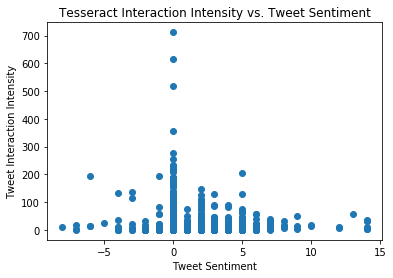

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(tweet_sent_T, interaction_intensity_T)
plt.xlabel('Tweet Sentiment')
plt.ylabel('Tweet Interaction Intensity')
plt.title('Tesseract Interaction Intensity vs. Tweet Sentiment')

Text(0.5,1,'Periphery Interaction Intensity vs. Tweet Sentiment')

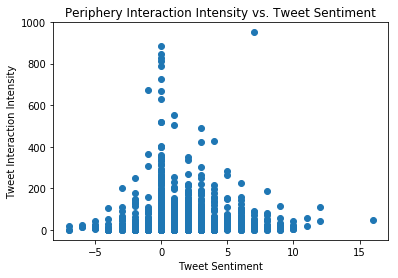

In [162]:
plt.scatter(tweet_sent_P, interaction_intensity_P)
plt.xlabel('Tweet Sentiment')
plt.ylabel('Tweet Interaction Intensity')
plt.title('Periphery Interaction Intensity vs. Tweet Sentiment')

In [117]:
ks_2samp(interaction_intensity_T, interaction_intensity_P)

Ks_2sampResult(statistic=0.2278641207498498, pvalue=5.3806503638091203e-57)

In [118]:
print(sum(tweet_sent_T)/len(tweet_sent_T))
print(sum(tweet_sent_P)/len(tweet_sent_P))

0.7607417458163727
1.0294426919032598


In [119]:
print(sum(interaction_intensity_T)/len(interaction_intensity_T))
print(sum(interaction_intensity_P)/len(interaction_intensity_P))

13.528267752148349
30.784787942516648


In [120]:
# number of positive vs negative tweets

def count_twt_sentiments(list_sentiments):
    count_pos = 0
    count_neg = 0
    count_neutral = 0
    
    for twt in list_sentiments:
        if twt>0:
            count_pos += 1
        elif twt < 0:
            count_neg += 1
        else:
            count_neutral += 1
    
    return count_pos, count_neg, count_neutral

In [121]:
pos_twt_T, neg_twt_T, neu_twt_T = count_twt_sentiments(tweet_sent_T)
pos_twt_P, neg_twt_P, neu_twt_P = count_twt_sentiments(tweet_sent_P)

In [122]:
print('Tesseract: ' + str(pos_twt_T) + ' ' + str(neg_twt_T) + ' ' + str(neu_twt_T))
print('Periphery: ' + str(pos_twt_P) + ' ' + str(neg_twt_P) + ' ' + str(neu_twt_P))

Tesseract: 683 117 1411
Periphery: 1183 320 1350


In [123]:
def ii_contribution(tweet_sent, interaction_intensity):
    pos_ii = 0
    neg_ii = 0
    neu_ii = 0
    for i in range(len(tweet_sent)):
        if tweet_sent[i] > 0:
            pos_ii += interaction_intensity[i]
        elif tweet_sent[i] < 0:
            neg_ii += interaction_intensity[i]
        else:
            neu_ii += interaction_intensity[i]
    tot = pos_ii + neg_ii + neu_ii
    return pos_ii/tot, neg_ii/tot, neu_ii/tot

In [124]:
pos_ii_T, neg_ii_T, neu_ii_T = ii_contribution(tweet_sent_T, interaction_intensity_T)
pos_ii_P, neg_ii_P, neu_ii_P = ii_contribution(tweet_sent_P, interaction_intensity_P)

In [125]:
print(pos_ii_T, neg_ii_T, neu_ii_T)
print(pos_ii_P, neg_ii_P, neu_ii_P)

0.28136805857376884 0.05513021965163318 0.663501721774598
0.400756014528231 0.08746541575106172 0.5117785697207072


In [126]:
# Vader to the rescue....

from nltk.sentiment import vader

analyzer = vader.SentimentIntensityAnalyzer()
analyzer.polarity_scores(tesseract_tweets[0]['full_text'])

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [127]:
polar_T = [analyzer.polarity_scores(tweet['full_text']) for tweet in tesseract_tweets if 'retweeted_status' not in tweet]
polar_P = [analyzer.polarity_scores(tweet['full_text']) for tweet in periphery_tweets if 'retweeted_status' not in tweet]

(array([  2.00000000e+00,   1.00000000e+00,   4.00000000e+00,
          3.00000000e+00,   7.00000000e+00,   9.00000000e+00,
          1.80000000e+01,   2.10000000e+01,   1.70000000e+01,
          1.20000000e+01,   1.00000000e+01,   9.00000000e+00,
          1.39000000e+03,   1.20000000e+01,   1.80000000e+01,
          2.00000000e+01,   3.40000000e+01,   1.50000000e+02,
          1.15000000e+02,   5.90000000e+01,   1.09000000e+02,
          8.40000000e+01,   5.40000000e+01,   3.20000000e+01,
          2.10000000e+01]),
 array([-0.9042 , -0.82988, -0.75556, -0.68124, -0.60692, -0.5326 ,
        -0.45828, -0.38396, -0.30964, -0.23532, -0.161  , -0.08668,
        -0.01236,  0.06196,  0.13628,  0.2106 ,  0.28492,  0.35924,
         0.43356,  0.50788,  0.5822 ,  0.65652,  0.73084,  0.80516,
         0.87948,  0.9538 ]),
 <a list of 25 Patch objects>)

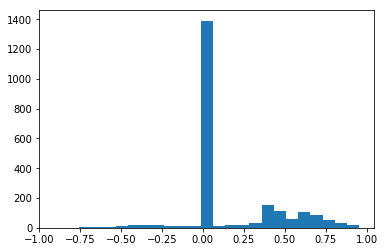

In [128]:
plt.hist([score['compound'] for score in polar_T], bins = 25)

(array([  1.00000000e+00,   8.00000000e+00,   6.00000000e+00,
          3.00000000e+01,   1.70000000e+01,   2.60000000e+01,
          4.20000000e+01,   2.60000000e+01,   3.60000000e+01,
          2.50000000e+01,   1.80000000e+01,   8.00000000e+00,
          1.35000000e+03,   3.10000000e+01,   3.20000000e+01,
          6.10000000e+01,   7.70000000e+01,   1.40000000e+02,
          1.66000000e+02,   1.85000000e+02,   2.09000000e+02,
          1.10000000e+02,   1.16000000e+02,   1.01000000e+02,
          3.20000000e+01]),
 array([-0.9234  , -0.847996, -0.772592, -0.697188, -0.621784, -0.54638 ,
        -0.470976, -0.395572, -0.320168, -0.244764, -0.16936 , -0.093956,
        -0.018552,  0.056852,  0.132256,  0.20766 ,  0.283064,  0.358468,
         0.433872,  0.509276,  0.58468 ,  0.660084,  0.735488,  0.810892,
         0.886296,  0.9617  ]),
 <a list of 25 Patch objects>)

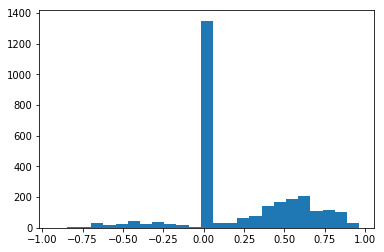

In [129]:
plt.hist([score['compound'] for score in polar_P], bins = 25)

Now that we know that positive tweets tends to lead to more user engagement and Periphery tends to be very positive, are they abnormally positive compared to average?

In [41]:
import pickle

with open('ref_tweets.pickle', 'rb') as f:
    ref_tweets = pickle.load(f)

In [42]:
ref_twt = [t['full_text'] for k, v in ref_tweets.items() for t in v]

In [43]:
ref_bow = clean_tweets(ref_twt)

In [44]:
ref_bow = strip_tweets(ref_bow)

In [45]:
ref_bow

['veri',
 'that',
 'great',
 'tour',
 'thank',
 'good',
 'us',
 'which',
 'show',
 'see',
 'thank',
 'kind',
 'word',
 'onli',
 'date',
 'left',
 'run',
 'tesseract',
 'tonight',
 'tesseract',
 '“luminari',
 'onli',
 'date',
 'left',
 'run',
 'tonight',
 'correct',
 'thank',
 'best',
 'host',
 'band',
 'crew',
 'crowd',
 'enjoy',
 'even',
 'photo',
 'photon',
 'manipul',
 'audio',
 'master',
 'tonight',
 'tesseract',
 'pretti',
 'cool',
 'thank',
 'LA',
 'who',
 'see',
 'san',
 'diego',
 'tonight',
 'berkeley',
 'tomorrow',
 'ticket',
 'abl',
 'help',
 'issu',
 'where',
 'purchas',
 'club',
 'red',
 'mesa',
 'you',
 'guy',
 'sincer',
 'much',
 'fun',
 'thank',
 'best',
 'fan',
 'peopl',
 'ever',
 'soon',
 'promis',
 'may',
 'tesseract',
 'congratul',
 'what',
 'everyon',
 'favorit',
 'track',
 'far',
 'great',
 'get',
 'septemb',
 'check',
 'date',
 'atlanta',
 'tonight',
 'At',
 'masquerad',
 'tesseract',
 'greensboro',
 'NC',
 'tonight',
 'door',
 'tesseract',
 'what',
 'way',
 'cele

In [46]:
def construct_twts(bow, list_of_twt_lens):
    import random
    output = []
    for twt_len in list_of_twt_lens:
        # sample nwrd words from bow
        wrd_index = random.sample(range(len(bow)), twt_len)
        output.append([bow[i] for i in wrd_index])
    
    return output


In [47]:
twt_len_T = [len(tweet) for tweet in twt_stripped_T]
twt_len_P = [len(tweet) for tweet in twt_stripped_P]

We want to construct the null sentiment from the reference tweets to see if how the two bands' sentiment compare with the default.

In [48]:
ref_sent_T = []
for i in range(10000):
    temp = construct_twts(ref_bow, twt_len_T)
    ref_sent_T.append(sum([sum(pull_sentiment(tweet)) for tweet in temp]))

In [49]:
ref_sent_P = []
for i in range(10000):
    temp = construct_twts(ref_bow, twt_len_P)
    ref_sent_P.append(sum([sum(pull_sentiment(tweet)) for tweet in temp]))

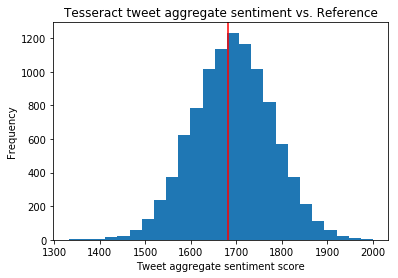

In [50]:
plt.hist(ref_sent_T, bins = 25)
plt.axvline(x=sum(pull_sentiment(words_stripped_T)), c = 'r')
plt.title('Tesseract tweet aggregate sentiment vs. Reference')
plt.xlabel('Tweet aggregate sentiment score')
plt.ylabel('Frequency')

plt.savefig('Tesseract_Sent_Ref.png')

In [52]:
# calculate p-value of aggregate sentiments

def calculate_pvalue(reference, target):
    count = 0
    for i in reference:
        if i <= target:
            count += 1
    return count/len(reference)

In [53]:
calculate_pvalue(ref_sent_T, sum(pull_sentiment(words_stripped_T)))

0.4524

In [163]:
sum(pull_sentiment(words_stripped_T))

1682

In [164]:
sum(pull_sentiment(words_stripped_P))

2937

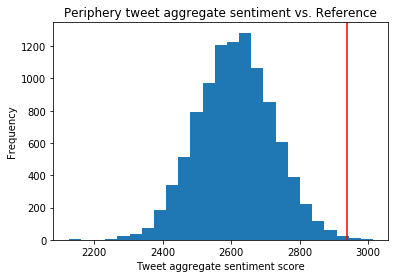

In [51]:
plt.hist(ref_sent_P, bins = 25)
plt.axvline(x = sum(pull_sentiment(words_stripped_P)), c = 'r')
plt.title('Periphery tweet aggregate sentiment vs. Reference')
plt.xlabel('Tweet aggregate sentiment score')
plt.ylabel('Frequency')
plt.savefig('Periphery_Sent_Ref.png')

In [54]:
calculate_pvalue(ref_sent_P, sum(pull_sentiment(words_stripped_P)))

0.9986

This seems to be evidence for Periphery's aggregate tweet sentiment being far out of the norm.  Only less than 1% of the time do we expect a band's tweets to carry aggregate positive sentiment like what we observe from Periphery's tweets.  This means that Periphery is systematically employing words associated with positive sentiments, which lead to higher than expected fan engagement on twitter.

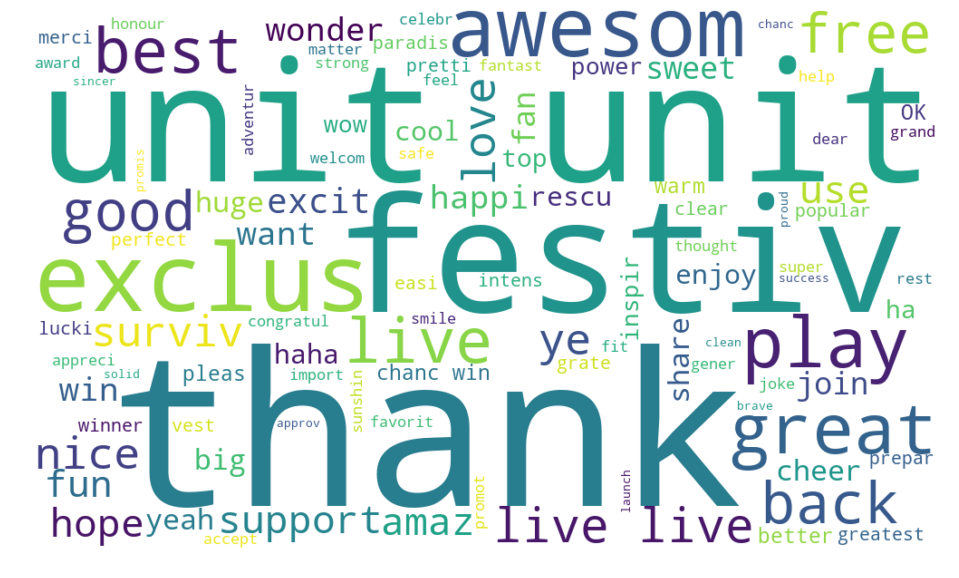

In [190]:
# Wordclouding Positive Words
from wordcloud import WordCloud


# Generate a word cloud image
wordcloud = WordCloud(width = 1000, height = 600, background_color='white', max_words=100).generate(' '.join([word for word in words_stripped_T if pull_sentiment_word(word) is not None and pull_sentiment_word(word) > 0]))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('T_Wordcould.png')

In [178]:
WordCloud?

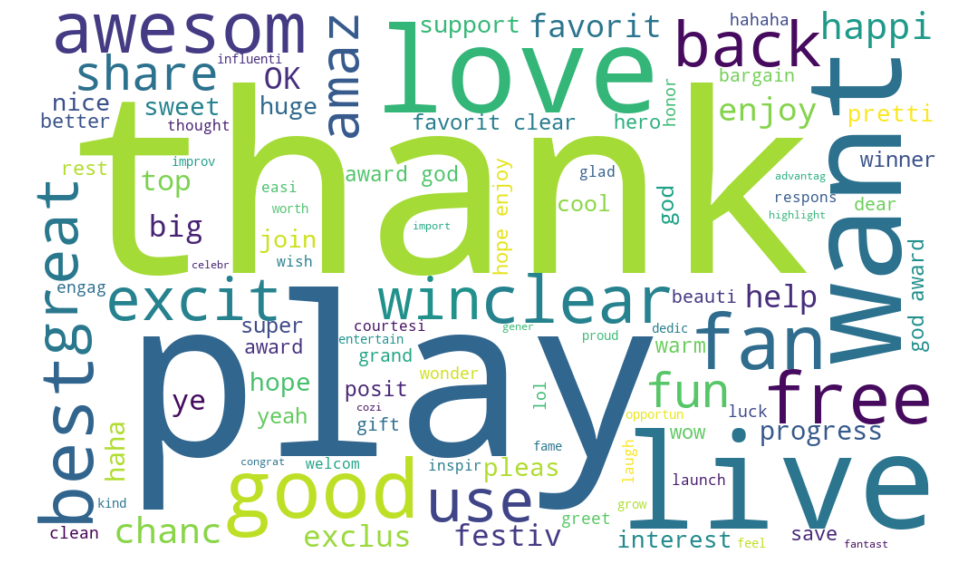

In [191]:
# Generate a word cloud image
wordcloud = WordCloud(width = 1000, height = 600, background_color='white', max_words=100).generate(' '.join([word for word in words_stripped_P if pull_sentiment_word(word) is not None and pull_sentiment_word(word) > 0]))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('P_Wordcould.png')